<a href="https://colab.research.google.com/github/ChizobaNzeakor/lagos-waste-analysis/blob/main/illegal_waste_dumpsites1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [ ]:
# 📁 Upload your Excel file manually
from google.colab import files
uploaded = files.upload()



Saving LAGOS STATE ILLEGAL WASTE DUMPSITE.xlsx to LAGOS STATE ILLEGAL WASTE DUMPSITE (4).xlsx


In [ ]:
# 📁 STEP 2: Upload the Excel file
from google.colab import files
uploaded = files.upload()

Saving LAGOS STATE ILLEGAL WASTE DUMPSITE.xlsx to LAGOS STATE ILLEGAL WASTE DUMPSITE.xlsx


In [ ]:
# 📄 STEP 3: Load the Excel file into a pandas DataFrame
import pandas as pd
import io

In [ ]:
filename = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_excel(io.BytesIO(uploaded[filename]))

In [ ]:
# 👁️ STEP 4: Preview your data
print("Columns in your dataset:", df.columns.tolist())
df.head()

Columns in your dataset: ['Name', 'Latitude', 'Longitude', 'Reference Link']


,Name,Latitude,Longitude,Reference Link
0,Amuwo-Odofin,6.4663,3.3015,https://www.vanguardngr.com/2021/10/lawma-vows...
1,Ijora,6.4681,3.3795,https://businessday.ng/real-estate/article/n20...
2,Mile 2,6.4640,3.3430,https://pmnewsnigeria.com/2025/02/04/lawma-cra...
3,Berger Suya,6.4655,3.3448,https://www.vanguardngr.com/2020/11/abandoned-...
4,Anthony,6.5569,3.3673,https://guardian.ng/property/lagos-clamps-down...


In [ ]:
# 🌍 STEP 5: Convert DataFrame to GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Make sure your columns are named exactly 'Longitude' and 'Latitude'
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import osmnx as ox
import folium

In [ ]:
# Get Lagos boundary from OSM
lagos_boundary = ox.geocode_to_gdf("Lagos, Nigeria")

<Axes: >

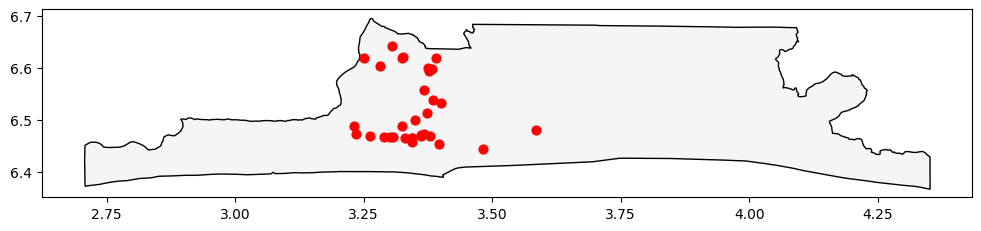

In [ ]:
# Plot: Lagos base + dumpsites
fig, ax = plt.subplots(figsize=(12, 12))
lagos_boundary.plot(ax=ax, color="whitesmoke", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=40, label="Illegal Dumpsites")

In [ ]:
# Center map around Lagos
m = folium.Map(location=[6.5244, 3.3792], zoom_start=11)

In [ ]:
# 📌 Add dumpsite markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color="crimson",
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(row["Name"], max_width=300) if "Name" in df.columns else None,
        tooltip=row["Name"] if "Name" in df.columns else None
    ).add_to(m)


In [ ]:
# 🗺️ Show the map by ending with this line
m


In [ ]:
# 🎯 Add stylish markers with tooltip + popup
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=7,
        color="limegreen",
        fill=True,
        fill_color="limegreen",
        fill_opacity=0.9,
        tooltip=row["Name"] if "Name" in df.columns else "Illegal Dumpsite",
        popup=folium.Popup(row["Name"], max_width=250) if "Name" in df.columns else None
    ).add_to(m)

# 👁️ Display the map
display(m)

In [ ]:

import folium
from folium.plugins import MarkerCluster, MiniMap, MousePosition
from IPython.display import display


In [ ]:
m = folium.Map(
    location=[6.5244, 3.3792],
    zoom_start=11,
    tiles="CartoDB dark_matter",
    control_scale=True   # <— this must be followed by a closing parenthesis
)


In [ ]:
# Add base tile layers
folium.TileLayer("OpenStreetMap", name="OSM").add_to(m)
folium.TileLayer("CartoDB positron", name="Light Grey").add_to(m)
folium.TileLayer("CartoDB dark_matter", name="Dark Mode").add_to(m)
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name="Stamen Terrain"
).add_to(m)



In [ ]:
# Mini map
MiniMap(toggle_display=True).add_to(m)

# Mouse coordinates
MousePosition(position='bottomleft').add_to(m)

# Marker cluster
marker_cluster = MarkerCluster(name="Illegal Dumpsites").add_to(m)

# Add points and 1km buffer zones
for _, row in df.iterrows():
    # Add marker
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color="crimson",
        fill=True,
        fill_opacity=0.8,
        popup=row["Name"] if "Name" in df.columns else "Illegal Dumpsite"
    ).add_to(marker_cluster)

    # Add 1km buffer circle
    folium.Circle(
        location=[row["Latitude"], row["Longitude"]],
        radius=1000,
        color='blue',
        fill=True,
        fill_opacity=0.05,
        weight=1
    ).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Show map
m



In [ ]:
# 🗺️ Create map with a light terrain-style base
m = folium.Map(
    location=[6.5244, 3.3792],
    zoom_start=11,
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    control_scale=True
)

# Optional alternative base layers
folium.TileLayer("OpenStreetMap", name="OpenStreetMap").add_to(m)
folium.TileLayer("CartoDB positron", name="Light").add_to(m)
folium.TileLayer("CartoDB dark_matter", name="Dark").add_to(m)

In [ ]:
# Add only one mini map
MiniMap(toggle_display=True, position="bottomright").add_to(m)

# Show mouse coordinates
MousePosition(position='bottomleft').add_to(m)

# Marker cluster group
marker_cluster = MarkerCluster(name="Illegal Dumpsites").add_to(m)

# Add markers + 1km buffer zones
for _, row in df.iterrows():
    location = [row["Latitude"], row["Longitude"]]

    # Marker
    folium.CircleMarker(
        location=location,
        radius=6,
        color="crimson",
        fill=True,
        fill_opacity=0.9,
        popup=row["Name"] if "Name" in df.columns else "Illegal Dumpsite",
        tooltip=row["Name"] if "Name" in df.columns else None
    ).add_to(marker_cluster)

    # Buffer zone
    folium.Circle(
        location=location,
        radius=1000,
        color='blue',
        fill=True,
        fill_opacity=0.05,
        weight=1
    ).add_to(m)

# Add layer control toggle
folium.LayerControl(collapsed=False).add_to(m)

# 👁️ Display the interactive map
display(m)

In [ ]:
# Export map as HTML file you can download or open in browser
m.save("lagos_illegal_dumpsites_map.html")
files.download("lagos_illegal_dumpsites_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>